In [1]:
#Linear Reg, KNN, RF Model
#Cross Validation & MAE
#Grid Search CV for hyperparameter tuning

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [37]:
X = pd.read_csv("X Data.csv")
numeric_df = pd.read_csv('Numeric Data.csv')

In [38]:
X.head()

,Unnamed: 0,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DM_Los Angeles,DM_New York City,DM_Rhode Island,DM_Seattle,DM_Hotel room,DM_Private room,DM_Shared room
0,0,1.805040,-0.405302,-0.877451,-0.009224,0.944019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,-0.260837,0.021252,-0.660446,-0.204222,1.135798,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,-0.432994,0.362494,-0.674913,-0.399220,1.556235,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,-0.519072,0.362494,-0.284304,-0.399220,-0.619712,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,-0.174759,0.191873,-0.371106,0.575770,1.563611,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X = X.drop(columns='Unnamed: 0')

In [40]:
X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,DM_Los Angeles,DM_New York City,DM_Rhode Island,DM_Seattle,DM_Hotel room,DM_Private room,DM_Shared room
0,1.805040,-0.405302,-0.877451,-0.009224,0.944019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.260837,0.021252,-0.660446,-0.204222,1.135798,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.432994,0.362494,-0.674913,-0.399220,1.556235,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.519072,0.362494,-0.284304,-0.399220,-0.619712,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.174759,0.191873,-0.371106,0.575770,1.563611,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X.shape

(62808, 12)

In [42]:
X['minimum_nights'].max(), X['number_of_reviews'].max(), X['reviews_per_month'].max(), X['calculated_host_listings_count'].max(), X['availability_365'].max()

(6.108951607594908,
 3.689612474415388,
 2.9997064892032563,
 5.938219243507531,
 1.703756521029944)

In [43]:
numeric_df.head()

,Unnamed: 0,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,124,30,10,0.09,5,261
1,1,239,6,20,0.24,3,287
2,2,120,4,28,0.23,1,344
3,3,120,3,28,0.50,1,49
4,4,221,7,24,0.44,11,345


In [44]:
numeric_df = numeric_df.drop(columns='Unnamed: 0')

In [45]:
numeric_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,124,30,10,0.09,5,261
1,239,6,20,0.24,3,287
2,120,4,28,0.23,1,344
3,120,3,28,0.50,1,49
4,221,7,24,0.44,11,345


In [46]:
y = numeric_df['price']
y

0        124
1        239
2        120
3        120
4        221
        ... 
62803    100
62804     79
62805     79
62806    200
62807     35
Name: price, Length: 62808, dtype: int64

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=47)

In [48]:
X_train.shape, X_test.shape

((43965, 12), (18843, 12))

In [49]:
y_train.shape, y_test.shape

((43965,), (18843,))

In [50]:
X_train.dtypes

minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
DM_Los Angeles                    float64
DM_New York City                  float64
DM_Rhode Island                   float64
DM_Seattle                        float64
DM_Hotel room                     float64
DM_Private room                   float64
DM_Shared room                    float64
dtype: object

# First Model: Linear Regression

In [51]:
clm = LinearRegression()

In [52]:
clm.fit(X_train, y_train)

LinearRegression()

In [53]:
y_train_pred = clm.predict(X_train)
y_test_pred = clm.predict(X_test)

# Model Assessment

In [54]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.041151981818172256, 0.03648550030848563)

In [55]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(90.77983398426777, 91.44577409748027)

In [56]:
cv_results = cross_val_score(clm, X_train, y_train, cv = 5)
cv_results

array([0.0393077 , 0.03829459, 0.04321932, 0.04117278, 0.03871629])

In [57]:
np.mean(cv_results), np.std(cv_results)

(0.04014213711088246, 0.0018261442386076601)

In [58]:
np.round((np.mean(cv_results) - 2 * np.std(cv_results), np.mean(cv_results) + 2 * np.std(cv_results)), 2)

array([0.04, 0.04])

# Hyperparameter tuning with GridSearchCV 

In [59]:
pipe = make_pipeline(SelectKBest(f_regression, k='all'), LinearRegression())

In [60]:
pipe.fit(X_train, y_train)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001CC5D3BF790>)),
                ('linearregression', LinearRegression())])

In [61]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [62]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.041151981818172256, 0.03648550030848563)

In [63]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(90.77983398426777, 91.44577409748027)

In [64]:
cv_results2 = cross_val_score(pipe, X_train, y_train, cv=5)
print(cv_results2)

[0.0393077  0.03829459 0.04321932 0.04117278 0.03871629]


C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [65]:
np.mean(cv_results2), np.std(cv_results2)

(0.04014213711088246, 0.0018261442386076601)

In [66]:
np.round((np.mean(cv_results2) - 2 * np.std(cv_results2), np.mean(cv_results2) + 2 * np.std(cv_results2)), 2)

array([0.04, 0.04])

In [67]:
k  =[k+1 for k in range(len(X_train.columns))]
params = {'selectkbest__k': k}

In [68]:
lr_grid_cv = GridSearchCV(pipe, param_grid = params, cv=5, n_jobs=-1)

In [69]:
lr_grid_cv.fit(X_train, y_train)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x000001CC5D3BF790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12]})

In [70]:
lr_grid_cv.best_params_

{'selectkbest__k': 4}

In [71]:
pipe_best = make_pipeline(SelectKBest(f_regression, k=4), LinearRegression())

In [72]:
pipe_best.fit(X_train, y_train)
y_pr_lr = pipe_best.predict(X_test)

C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [73]:
r2_score(y_test, y_pr_lr)

0.03648716958172904

In [74]:
mean_absolute_error(y_test, y_pr_lr)

91.44311495606448

In [75]:
cv_best = cross_val_score(pipe_best, X_train, y_train, cv=5)
print(cv_best)

[0.03930799 0.03844228 0.04324242 0.04133521 0.03894252]


C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\malak\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [76]:
np.mean(cv_best), np.std(cv_best)

(0.040254082733823734, 0.0017886806401000057)

In [77]:
np.round((np.mean(cv_best) - 2 * np.std(cv_best), np.mean(cv_best) + 2 * np.std(cv_best)), 2)

array([0.04, 0.04])

# Most Useful Features

In [78]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [79]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

availability_365                  22.877336
calculated_host_listings_count     9.626315
minimum_nights                   -10.599375
reviews_per_month                -11.304104
dtype: float64

It appears that out of all features, according to this model, the availability throughout the year of a listing is the largest positive feature to predict price.

# Second Model: Random Forest Model

In [80]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Model Assessment

In [81]:
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(rf_cv_scores)

[0.04086884 0.04138612 0.06580814 0.04863903 0.05364879]


In [82]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.05007018603045073, 0.009193645513049768)

In [83]:
r2_score(y_test, y_pred_rf)

0.047391784624903344

In [84]:
mean_absolute_error(y_test, y_pred_rf)

91.11990512047727

# Hyperparameter Tuning Using GridSearchCV 

In [85]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [86]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'n_estimators' : n_est}
grid_params

{'n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [87]:
rf_grid_cv = GridSearchCV(rf, param_grid = grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [88]:
print(rf_grid_cv.best_estimator_)
print(rf_grid_cv.best_params_)

RandomForestRegressor(n_estimators=615)
{'n_estimators': 615}


In [89]:
rf_best = RandomForestRegressor(n_estimators=615)
rf_best.fit(X_train, y_train)
y_pr_best_rf = rf_best.predict(X_test)

In [90]:
cv_rf_best = cross_val_score(rf_best, X_train, y_train, cv=5)
print(cv_rf_best)

[0.0530111  0.04795248 0.07109282 0.05540963 0.05824551]


In [91]:
np.mean(cv_rf_best), np.std(cv_rf_best)

(0.057142308526042004, 0.007750558881697461)

In [92]:
mean_absolute_error(y_test, y_pr_best_rf)

90.86766943057333

# Model 3: KNN Regression

In [93]:
rmse_val = []
for K in range(20):
    K= K+1
    model = KNeighborsRegressor(n_neighbors=K)
    
    model.fit(X_train, y_train)
    y_pred_knn = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    rmse_val.append(error)
    print('RMSE value for k= ', K, 'is:', error)

RMSE value for k=  1 is: 181.88592286068481
RMSE value for k=  2 is: 159.26538135028363
RMSE value for k=  3 is: 150.9909765628085
RMSE value for k=  4 is: 147.09746487404772
RMSE value for k=  5 is: 144.30794455816178
RMSE value for k=  6 is: 142.40476883561587
RMSE value for k=  7 is: 141.17175746346186
RMSE value for k=  8 is: 140.25111147316028
RMSE value for k=  9 is: 139.54169509556306
RMSE value for k=  10 is: 139.15106790496614
RMSE value for k=  11 is: 138.77297888932205
RMSE value for k=  12 is: 138.38203328184167
RMSE value for k=  13 is: 137.97131439917226
RMSE value for k=  14 is: 137.68133206732412
RMSE value for k=  15 is: 137.3426171587716
RMSE value for k=  16 is: 137.097995968554
RMSE value for k=  17 is: 136.97036081657419
RMSE value for k=  18 is: 136.90921341776135
RMSE value for k=  19 is: 136.76732436113522
RMSE value for k=  20 is: 136.65540525520422


Text(0.5, 1.0, 'Elbow Curve')

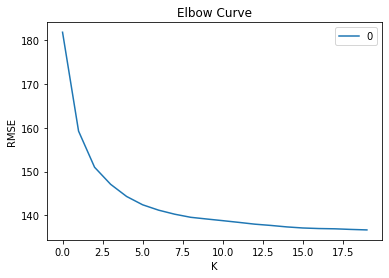

In [94]:
elbow_curve = pd.DataFrame(rmse_val)
elbow_curve.plot()
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('Elbow Curve')

# Hyperparameter tuning with GridSearchCV

In [95]:
grid_params = {'n_neighbors' : [2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model_best = GridSearchCV(knn, grid_params, cv=5)
model_best.fit(X_train, y_train)
y_pred_knn_best = model_best.predict(X_test)
print(model_best.best_estimator_)

KNeighborsRegressor(n_neighbors=9)


In [96]:
cv_knn_best = cross_val_score(model_best, X_train, y_train, cv=5)
print(cv_knn_best)

[0.04330154 0.02695634 0.04000048 0.04653866 0.03210706]


In [97]:
np.mean(cv_knn_best), np.std(cv_knn_best)

(0.037780817797245625, 0.007231404045938098)

In [98]:
r2_score(y_test, y_pred_knn_best)

0.035388185869842936

In [99]:
mean_absolute_error(y_test, y_pred_knn_best)

90.92903347544328

# Negative MAE Comparison  

In [100]:
lr_neg_mae = cross_val_score(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [101]:
lr_mae_mean = np.mean(-1 * lr_neg_mae)
lr_mae_std = np.std(-1 * lr_neg_mae)
lr_mae_mean, lr_mae_std

(90.80025591030694, 1.7138322537992705)

In [102]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

91.44311495606448

In [103]:
rf_neg_mae = cross_val_score(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [104]:
rf_mae_mean = np.mean(-1 * rf_neg_mae)
rf_mae_std = np.std(-1 * rf_neg_mae)
rf_mae_mean, rf_mae_std

(90.1607498949677, 1.8187281898631396)

In [105]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

90.8024316336467

In [106]:
knn_neg_mae = cross_val_score(model_best.best_estimator_, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

In [107]:
knn_neg_mae_mean = np.mean(-1 * knn_neg_mae)
knn_neg_mae_std = np.std(-1 * knn_neg_mae)
knn_neg_mae_mean, knn_neg_mae_std

(90.29310689058215, 1.9588961136330953)

In [108]:
mean_absolute_error(y_test,model_best.best_estimator_.predict(X_test))

90.92903347544328

In [117]:
y.mean()

157.8596038721182

# Conclusion

After cross-validating and hyperparameter tuning with grid search CV on all three models, it appears that the best performing model in terms of mean absolute error is the Random Forest Model, as  it had the lowest MAE out of all models (90.16),  and second highest variability (1.82) after hyperparameter tuning. The KNN Regression model is the second best performing model, because it had a slightly higher MAE (90.93) (but still lower than the Linear Regression Model), although it had the highest variability (1.96). The Linear Regression model was the worst performing with the highest MAE (91.44), however it had the lowest variability out of all 3 models (1.71). 

The results suggest that the Random Forest model had the most accuracy of predicting price in dollar terms. It was more accurate than the KNN Regression model by 0.77 dollars, and more accurate than the Linear Regression model by 1.28 dollars. 
All three models peform better than predicting price by simply taking its mean, which is $157.86. Additionally, the differences in accuracy across models were not very large.

Since the Random Forest Regression model showed to be the most accurate model to predict listing price, I will proceed with using this model over the KNN Regression or Linear Regression Model. 

It is also important to note that the most useful feature revealed by the Linear Regression Model to predict price was the listing avaialibility throughout the year.

In [109]:
import joblib

In [110]:
model = rf_best
filename = 'RF Model.sav'
joblib.dump(model, filename)

['RF Model.sav']